In [1]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
from matplotlib import animation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
hrrr_dap_sfc = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/surface')

In [4]:
print hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface']

<type 'netCDF4._netCDF4.Variable'>
float32 Planetary_boundary_layer_height_surface(reftime, time3, y, x)
    long_name: Planetary boundary layer height @ Ground or water surface
    units: m
    description: Planetary boundary layer height
    missing_value: nan
    grid_mapping: LambertConformal_Projection
    coordinates: reftime time3 y x 
    Grib_Variable_Id: VAR_0-3-18_L1
    Grib2_Parameter: [ 0  3 18]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Mass
    Grib2_Parameter_Name: Planetary boundary layer height
    Grib2_Level_Type: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (64, 16, 1059, 1799)
filling off



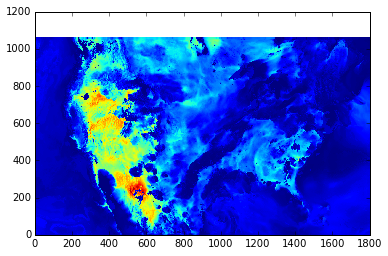

In [5]:
plt.pcolormesh(hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][0,0,:,:])

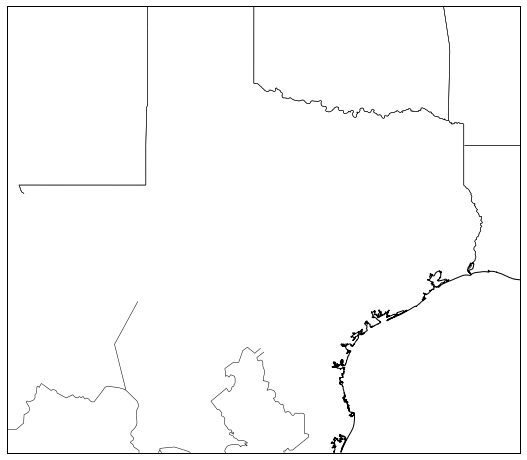

In [32]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.drawstates()
m.drawcoastlines()

In [11]:
hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'].shape

(64, 16, 1059, 1799)

In [12]:
var = hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface']

In [13]:
var.dimensions

(u'reftime', u'time3', u'y', u'x')

In [19]:
print hrrr_dap_sfc.variables['x'].dimensions

(u'x',)


In [22]:
xg, yg = np.meshgrid(hrrr_dap_sfc.variables['x'][:]*1000.0, hrrr_dap_sfc.variables['y'][:]*1000.0)

In [30]:
print xg.shape
print yg.shape
print var[0, 0, :, :].shape

(1059, 1799)
(1059, 1799)
(1059, 1799)


In [31]:
x = xg
y = yg
z = var[0,0,:,:]

<matplotlib.colorbar.Colorbar instance at 0x1b1873b90>

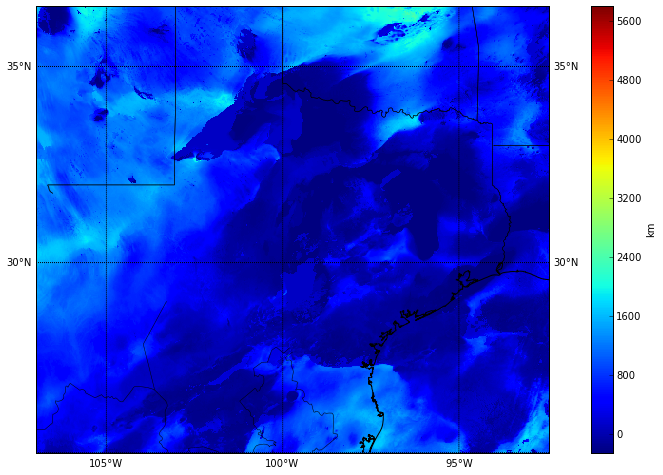

In [33]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.pcolormesh(x, y, hrrr_dap_sfc.variables['Planetary_boundary_layer_height_surface'][0,0,:,:]-273.15, vmin = None, vmax = None)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
m.drawstates()
m.drawcoastlines()
plt.colorbar(label='km') 